In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [18]:
import cv2
img = cv2.imread('images/dog1.jpg')

resized_nearest_small = cv2.resize(img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_NEAREST)
resized_nearest_bigger = cv2.resize(resized_nearest_small, None, fx=4, fy=4, interpolation=cv2.INTER_NEAREST)


# 결과 이미지 표시
cv2.imshow('Original', img)
cv2.imshow('Nearest', resized_nearest_bigger)
# cv2.imshow('Linear', resized_linear)
# cv2.imshow('Cubic', resized_cubic)
# cv2.imshow('Area', resized_area)
# cv2.imshow('Lanczos', resized_lanczos)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
import cv2

img = cv2.imread('images/dog1.jpg')

# 비율로만 하는게 아니라 픽셀값 직접 설정
resize_img = cv2.resize(img, (125, 80), interpolation=cv2.INTER_LINEAR)
nearest_img = cv2.resize(resize_img, None, fx=5, fy=5, interpolation = cv2.INTER_NEAREST)
linear_img = cv2.resize(resize_img, None, fx=5, fy=5, interpolation = cv2.INTER_LINEAR)
cubic_img = cv2.resize(resize_img, None, fx=5, fy=5, interpolation = cv2.INTER_CUBIC)
lanczos_img = cv2.resize(resize_img, None, fx=5, fy=5, interpolation = cv2.INTER_LANCZOS4)


# cv2.imshow('ORIGINAL', img)
# cv2.imshow('RESIZE', resize_img)
cv2.imshow('nearest_img', nearest_img)
cv2.imshow('linear_img', linear_img)
cv2.imshow('cubic_img', cubic_img)
cv2.imshow('lanczos_img', lanczos_img)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [48]:
import cv2
import numpy as np

# 이미지 로드
img = cv2.imread('images/dog1.jpg')
# img.shape
# 이미지 사이즈 정보
x = img.shape[1]
y = img.shape[0]
y, x = img.shape[:2]

# 이동변환 행렬
M = np.float32([[1,0,100],[0,1,50]])


move_img = cv2.warpAffine(img, M, (x,y))

cv2.imshow('CAT', img)
cv2.imshow('MOVE', move_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [49]:
import cv2
import numpy as np

img = cv2.imread('images/dog1.jpg')

roi_img = img[50:250, 150:300]

cv2.imshow('CAT', roi_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [50]:
import cv2

img = cv2.imread('images/dog1.jpg')

y, x = img.shape[:2]

# 회전 중심점과 회전 각도, 스케일 설정
rot = cv2.getRotationMatrix2D((x/2, y/2), 90, 1.5)

rot_img = cv2.warpAffine(img, rot, (x,y))

cv2.imshow('Original', img)
cv2.imshow('Rotated', rot_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [51]:
import cv2
import numpy as np

img = cv2.imread('images/sunset.jpg')

x=320; y=150; w=50; h=50  #roi 좌표
roi = img[y:y+h, x:x+w] 

cv2.rectangle(roi, (0,0), (h-1, w-1), (0, 0, 255), 6)
cv2.imshow("img", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [52]:
import cv2
import numpy as np

img = cv2.imread('images/sunset.jpg')

x=320; y=150; w=50; h=50  #roi 좌표
roi = img[y:y+h, x:x+w]
img2 = roi.copy()  # 선택 영역 복사

img[y:y+h, x+w:x+w+w] = roi
cv2.rectangle(img, (x,y), (x+w+w, y+h), (0, 0, 255), 6)
cv2.imshow("img", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

2교시

In [53]:
## 이미지 저장
import cv2

img = cv2.imread('./images/cat1.jpg', cv2.IMREAD_GRAYSCALE)

cv2.imshow("CAT", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# jpg로 저장
gray_img = cv2.imwrite('./images/grayCat.jpg', img)
print(gray_img) # True False로 저장에 성공 여부가 나온다

# png로 저장
gray_img = cv2.imwrite('./images/grayCat.png', img)
print(gray_img) # True False로 저장에 성공 여부가 나온다

True
True


In [54]:
import cv2

cap = cv2.VideoCapture('images/burger.mp4')

# 동영상 코덱 설정
fourcc = cv2.VideoWriter_fourcc(*'DIVX') # 'D', 'I', 'V', 'X' 한 글자씩 입력되게

# 크기 설정(정수값, 여기서는 디폴트 값 사용)
width = round(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# FPS 설정
fps = cap.get(cv2.CAP_PROP_FPS)/2

out = cv2.VideoWriter('images/output.mp4', fourcc, fps, (width, height))

while True:
    if cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        out.write(frame) # 프레임을 직접 저장
        cv2.imshow('Frame', frame)

        if cv2.waitKey(100) == ord('q'): # 재생속도 조절
            break

out.release() # VideoWriter 객체 자원 해제
cap.release() # cap을 더이상 사용하지 않겠다. 자원 해제
cv2.destroyAllWindows()

(427, 640) (427, 640)
127.0


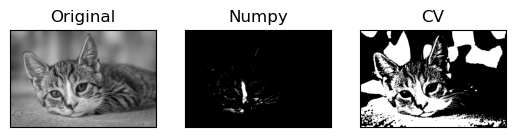

In [56]:
## 전역 스레시홀딩
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('images/cat1.jpg', cv2.IMREAD_GRAYSCALE)


## Numpy를 활용한 이미지 만들기
thresh_np = np.zeros_like(img) # img와 동일한 크기의 0으로된 2차원 배열
print(thresh_np.shape, img.shape)
thresh_np[img>200] = 255


## openCV에 있는 threshold 함수
ret, thresh_cv = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
print(ret)

imgs = {'Original':img, 'Numpy':thresh_np, 'CV':thresh_cv}

# imgs.items()는 imgs의 키와 벨류값을 하나의 튜플로 만들어서 가져온다.
# 여기서는 (key, value) 형태로 imgs.items() 요소들을 변수로 선언해줌
# enumerate는 인덱스 번호와 벨류값을 동시에 나오게 해줌.
for i, (key, value) in enumerate(imgs.items()):
    
    plt.subplot(1, 3, i+1)
    plt.title(key)
    plt.imshow(value, cmap='gray')
    
    # 축 값 표시 안함
    plt.xticks([])
    plt.yticks([])


plt.show()

# cv2.imshow('CAT2', thresh_np)
# cv2.imshow('CAT', thresh_cv)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

(450, 400) (450, 400)
127.0
131.0


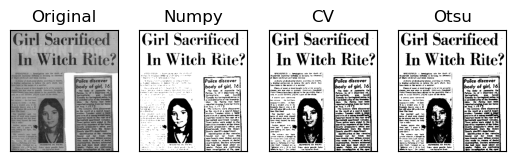

In [47]:
# 문서에서 경계값을 구분해서 인식하기 위함

## 전역 스레시홀딩
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('images/scaned_paper.jpg', cv2.IMREAD_GRAYSCALE)


## Numpy를 활용한 이미지 만들기
thresh_np = np.zeros_like(img) # img와 동일한 크기의 0으로된 2차원 배열
print(thresh_np.shape, img.shape)
thresh_np[img>100] = 255


## openCV에 있는 threshold 함수
ret, thresh_cv = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
print(ret)

## Otsu 알고리즘
ret_, thresh_otsu = cv2.threshold(img, -1, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print(ret_)

imgs = {'Original':img, 'Numpy':thresh_np, 'CV':thresh_cv, 'Otsu':thresh_otsu}

# imgs.items()는 imgs의 키와 벨류값을 하나의 튜플로 만들어서 가져온다.
# 여기서는 (key, value) 형태로 imgs.items() 요소들을 변수로 선언해줌
# enumerate는 인덱스 번호와 벨류값을 동시에 나오게 해줌.
for i, (key, value) in enumerate(imgs.items()):

    plt.subplot(1, 4, i+1)
    plt.title(key)
    plt.imshow(value, cmap='gray')
    
    # 축 값 표시 안함
    plt.xticks([])
    plt.yticks([])


plt.show()

# cv2.imshow('CAT2', thresh_np)
# cv2.imshow('CAT', thresh_cv)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

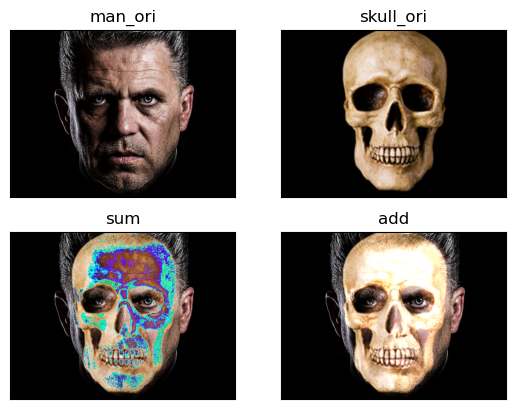

In [3]:
## 단순 이미지 합성
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 2개 불러오기
imga = cv2.imread('images/man_face.jpg')
imgb = cv2.imread('images/skull.jpg')

# 이미지 합성(덧셈)
img_sum = imga + imgb
img_add = cv2.add(imga, imgb)

imgs = {'man_ori':imga, 'skull_ori':imgb, 'sum':img_sum, 'add':img_add}
for i, (key, value) in enumerate(imgs.items()):

    plt.subplot(2, 2, i+1)
    plt.title(key)
    plt.imshow(value[:, :, ::-1])
    plt.xticks([])
    plt.yticks([])

In [4]:
## 투명도 조정을 이용한 이미지 합성
import cv2
import numpy as np

title = 'Alpha Blending'
trackbar_name = 'fade'

# 트랙바 핸들러
def onChange(x):
    alpha = x/100 # 이미지의 투명도
    dst = cv2.addWeighted(imga, 1-alpha, imgb, alpha, 0)
    cv2.imshow(title, dst)

# 이미지 2개 불러오기
imga = cv2.imread('images/man_face.jpg')
imgb = cv2.imread('images/skull.jpg')

cv2.imshow(title, imga)
cv2.createTrackbar(trackbar_name, title, 0, 100, onChange)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
# 원근 변환

import cv2
import numpy as np

win_name = "scanning"
img = cv2.imread("./images/paper.jpg")
rows, cols = img.shape[:2]
draw = img.copy()
pts_cnt = 0
pts = np.zeros((4,2), dtype=np.float32)

def onMouse(event, x, y, flags, param):  #마우스 이벤트 콜백 함수 구현 ---① 
    global  pts_cnt                     # 마우스로 찍은 좌표의 갯수 저장
    if event == cv2.EVENT_LBUTTONDOWN:  
        cv2.circle(draw, (x,y), 10, (0,255,0), -1) # 좌표에 초록색 동그라미 표시
        cv2.imshow(win_name, draw)

        pts[pts_cnt] = [x,y]            # 마우스 좌표 저장
        pts_cnt+=1
        if pts_cnt == 4:                       # 좌표가 4개 수집됨 
            # 좌표 4개 중 상하좌우 찾기 ---② 
            sm = pts.sum(axis=1)                 # 4쌍의 좌표 각각 x+y 계산
            diff = np.diff(pts, axis = 1)       # 4쌍의 좌표 각각 x-y 계산

            topLeft = pts[np.argmin(sm)]         # x+y가 가장 값이 좌상단 좌표
            bottomRight = pts[np.argmax(sm)]     # x+y가 가장 큰 값이 좌상단 좌표
            topRight = pts[np.argmin(diff)]     # x-y가 가장 작은 것이 우상단 좌표
            bottomLeft = pts[np.argmax(diff)]   # x-y가 가장 큰 값이 좌하단 좌표

            # 변환 전 4개 좌표 
            pts1 = np.float32([topLeft, topRight, bottomRight , bottomLeft])

            # 변환 후 영상에 사용할 서류의 폭과 높이 계산 ---③ 
            w1 = abs(bottomRight[0] - bottomLeft[0])    # 상단 좌우 좌표간의 거리
            w2 = abs(topRight[0] - topLeft[0])          # 하당 좌우 좌표간의 거리
            h1 = abs(topRight[1] - bottomRight[1])      # 우측 상하 좌표간의 거리
            h2 = abs(topLeft[1] - bottomLeft[1])        # 좌측 상하 좌표간의 거리
            width = max([w1, w2])                       # 두 좌우 거리간의 최대값이 서류의 폭
            height = max([h1, h2])                      # 두 상하 거리간의 최대값이 서류의 높이
            
            # 변환 후 4개 좌표
            pts2 = np.float32([[0,0], [width-1,0], 
                                [width-1,height-1], [0,height-1]])

            # 변환 행렬 계산 
            mtrx = cv2.getPerspectiveTransform(pts1, pts2)
            # 원근 변환 적용
            result = cv2.warpPerspective(img, mtrx, (int(width), int(height)))
            cv2.imshow('scanned', result)
cv2.imshow(win_name, img)
cv2.setMouseCallback(win_name, onMouse)    # 마우스 콜백 함수를 GUI 윈도우에 등록 ---④
cv2.waitKey(0)
cv2.destroyAllWindows()